In [1]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#importing the dataset

students = pd.read_csv('archive/Student Mental health.csv')
students

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...
96,13/07/2020 19:56:49,Female,21.0,BCS,year 1,3.50 - 4.00,No,No,Yes,No,No
97,13/07/2020 21:21:42,Male,18.0,Engineering,Year 2,3.00 - 3.49,No,Yes,Yes,No,No
98,13/07/2020 21:22:56,Female,19.0,Nursing,Year 3,3.50 - 4.00,Yes,Yes,No,Yes,No
99,13/07/2020 21:23:57,Female,23.0,Pendidikan Islam,year 4,3.50 - 4.00,No,No,No,No,No


In [7]:
#Descriptive statistics

students.describe().round(0)

,Age
count,100.0
mean,21.0
std,2.0
min,18.0
25%,18.0
50%,19.0
75%,23.0
max,24.0


In [4]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Timestamp                                     101 non-null    object 
 1   Choose your gender                            101 non-null    object 
 2   Age                                           100 non-null    float64
 3   What is your course?                          101 non-null    object 
 4   Your current year of Study                    101 non-null    object 
 5   What is your CGPA?                            101 non-null    object 
 6   Marital status                                101 non-null    object 
 7   Do you have Depression?                       101 non-null    object 
 8   Do you have Anxiety?                          101 non-null    object 
 9   Do you have Panic attack?                     101 non-null    obj

So based on these statistics, we can conclude that we have a null value in the age column, so we will fill it with the average age, which is the mean from students.describe()

In [9]:
students['Age'].fillna(21, inplace=True)

<AxesSubplot:>

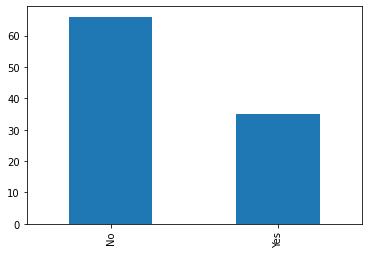

In [15]:
#Data exploration
#values count

students['Do you have Depression?'].value_counts().plot.bar()

<AxesSubplot:>

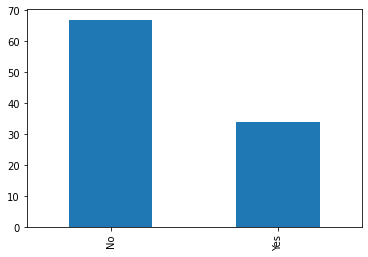

In [16]:
students['Do you have Anxiety?'].value_counts().plot.bar()

<AxesSubplot:>

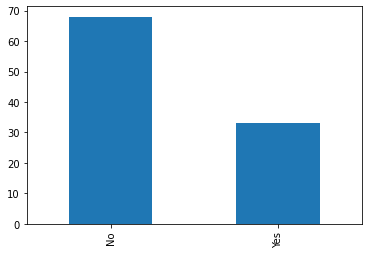

In [17]:
students['Do you have Panic attack?'].value_counts().plot.bar()

<AxesSubplot:>

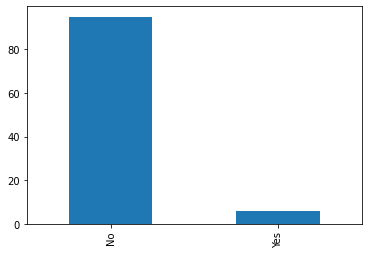

In [18]:
students['Did you seek any specialist for a treatment?'].value_counts().plot.bar()

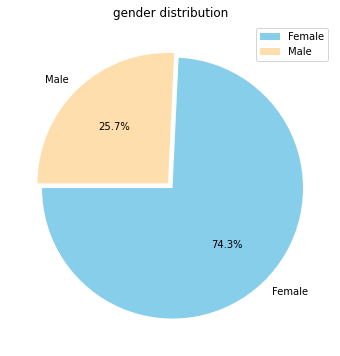

In [23]:
students.rename(columns = {'Choose your gender': 'gender'}, inplace = True)
plt.figure(figsize=(12,6))
plt.title("gender distribution")
g = plt.pie(students.gender.value_counts(), explode=(0.025,0.025), labels=students.gender.value_counts().index, colors=['skyblue','navajowhite'],autopct='%1.1f%%', startangle=180);
plt.legend()
plt.show()

Now let's see if there is any correlation between mental illness and other attributes
to try to determine if there is any underlying relationships
we will base our hypothesis on this fact

In [44]:
#analysis

students_numerical = students.copy()
students_numerical.head()

,Timestamp,gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [45]:

students_numerical['Your current year of Study'].unique()

array(['year 1', 'year 2', 'Year 1', 'year 3', 'year 4', 'Year 2',
       'Year 3'], dtype=object)

In [46]:
students['What is your CGPA?'].unique()

array(['3.00 - 3.49', '3.50 - 4.00', '3.50 - 4.00 ', '2.50 - 2.99',
       '2.00 - 2.49', '0 - 1.99'], dtype=object)

In [56]:
#replace yes/no with numerical values

from sklearn import preprocessing

students_numerical['Do you have Depression?'] = students_numerical['Do you have Depression?'].replace(['Yes','No'], [1,  0])
students_numerical['Marital status'] = students_numerical['Marital status'].replace(['Yes','No'], [1,  0])
students_numerical['Do you have Anxiety?'] = students_numerical['Do you have Anxiety?'].replace(['Yes','No'], [1,  0])
students_numerical['Do you have Panic attack?'] = students_numerical['Do you have Panic attack?'].replace(['Yes','No'], [1,  0])
students_numerical['Did you seek any specialist for a treatment?'] = students_numerical['Did you seek any specialist for a treatment?'].replace(['Yes','No'], [1,  0])
students_numerical['gender'] = students_numerical['gender'].replace(['Male','Female'] ,[1,  0])
students_numerical['Your current year of Study'] = students_numerical['Your current year of Study'].replace(['year 1', 'Year 1', 'year 2', 'Year 2', 'year 3', 'Year 3', 'year 4'], [1, 1,  2, 2, 3, 3, 4])
students_numerical['What is your CGPA?'] = students_numerical['What is your CGPA?'].replace(['0 - 1.99', '2.00 - 2.49', '2.50 - 2.99', '3.00 - 3.49','3.50 - 4.00', '3.50 - 4.00 ' ], [2,2.5,3,3.5,4,4])

lab_encoder = preprocessing.LabelEncoder()
students_numerical['What is your course?'] = lab_encoder.fit_transform(students_numerical['What is your course?'])

students_numerical

,Timestamp,gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,0,18.0,17,1,3.5,0,1,0,1,0
1,8/7/2020 12:04,1,21.0,25,2,3.5,0,0,1,0,0
2,8/7/2020 12:05,1,19.0,4,1,3.5,0,1,1,1,0
3,8/7/2020 12:06,0,22.0,33,3,3.5,1,1,0,0,0
4,8/7/2020 12:13,1,23.0,37,4,3.5,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
96,13/07/2020 19:56:49,0,21.0,2,1,4.0,0,0,1,0,0
97,13/07/2020 21:21:42,1,18.0,17,2,3.5,0,1,1,0,0
98,13/07/2020 21:22:56,0,19.0,38,3,4.0,1,1,0,1,0
99,13/07/2020 21:23:57,0,23.0,39,4,4.0,0,0,0,0,0


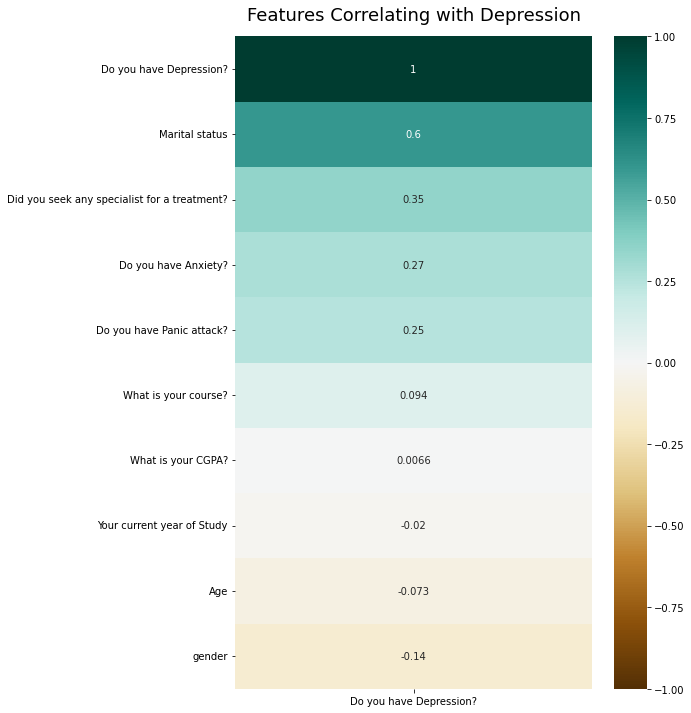

In [60]:
#Depression
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(students_numerical.corr()[['Do you have Depression?']].sort_values(by='Do you have Depression?', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Depression', fontdict={'fontsize':18}, pad=16);

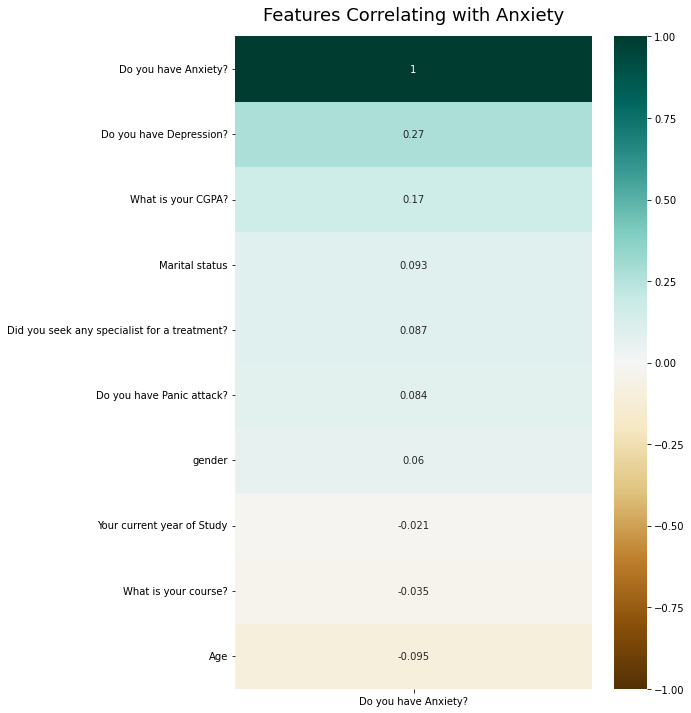

In [61]:
#ANXIETY

plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(students_numerical.corr()[['Do you have Anxiety?']].sort_values(by='Do you have Anxiety?', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Anxiety', fontdict={'fontsize':18}, pad=16);

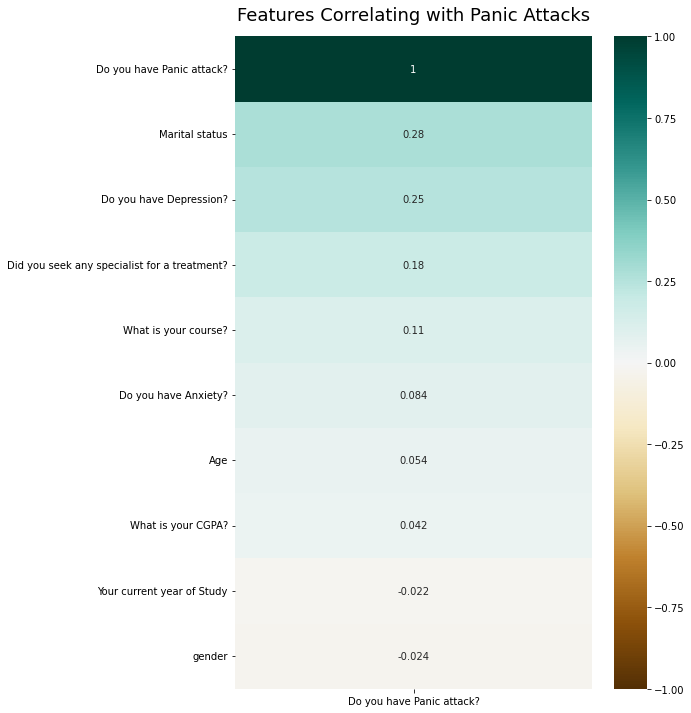

In [62]:
#Panic attacks

plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(students_numerical.corr()[['Do you have Panic attack?']].sort_values(by='Do you have Panic attack?', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Panic Attacks', fontdict={'fontsize':18}, pad=16);

In [63]:
#save to csv file

students.to_csv('students.csv')